## Using PCA create a face recognition system that gives access to only certain people. To implement this, you can use LFW_peoples dataset provided in the scikit-learn library. Given this dataset, use only those classes that have a minimum (use min_faces_per_person = 70, resize = 0.4 ) 70 images (should give you only 11 classes). Given this subset of images, apply PA to obtain the corresponding eigen face for each class. You can additionally train a classifier for recognition purpose. 

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
data = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

In [4]:
target_names = data['target_names']
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [5]:
data['images'].shape

(1288, 50, 37)

In [6]:
X = data['images']
X.shape

(1288, 50, 37)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
X_train.shape

(1030, 50, 37)

In [10]:
y_train.shape

(1030,)

In [11]:
X_train[1,:25,:18].shape

(25, 18)

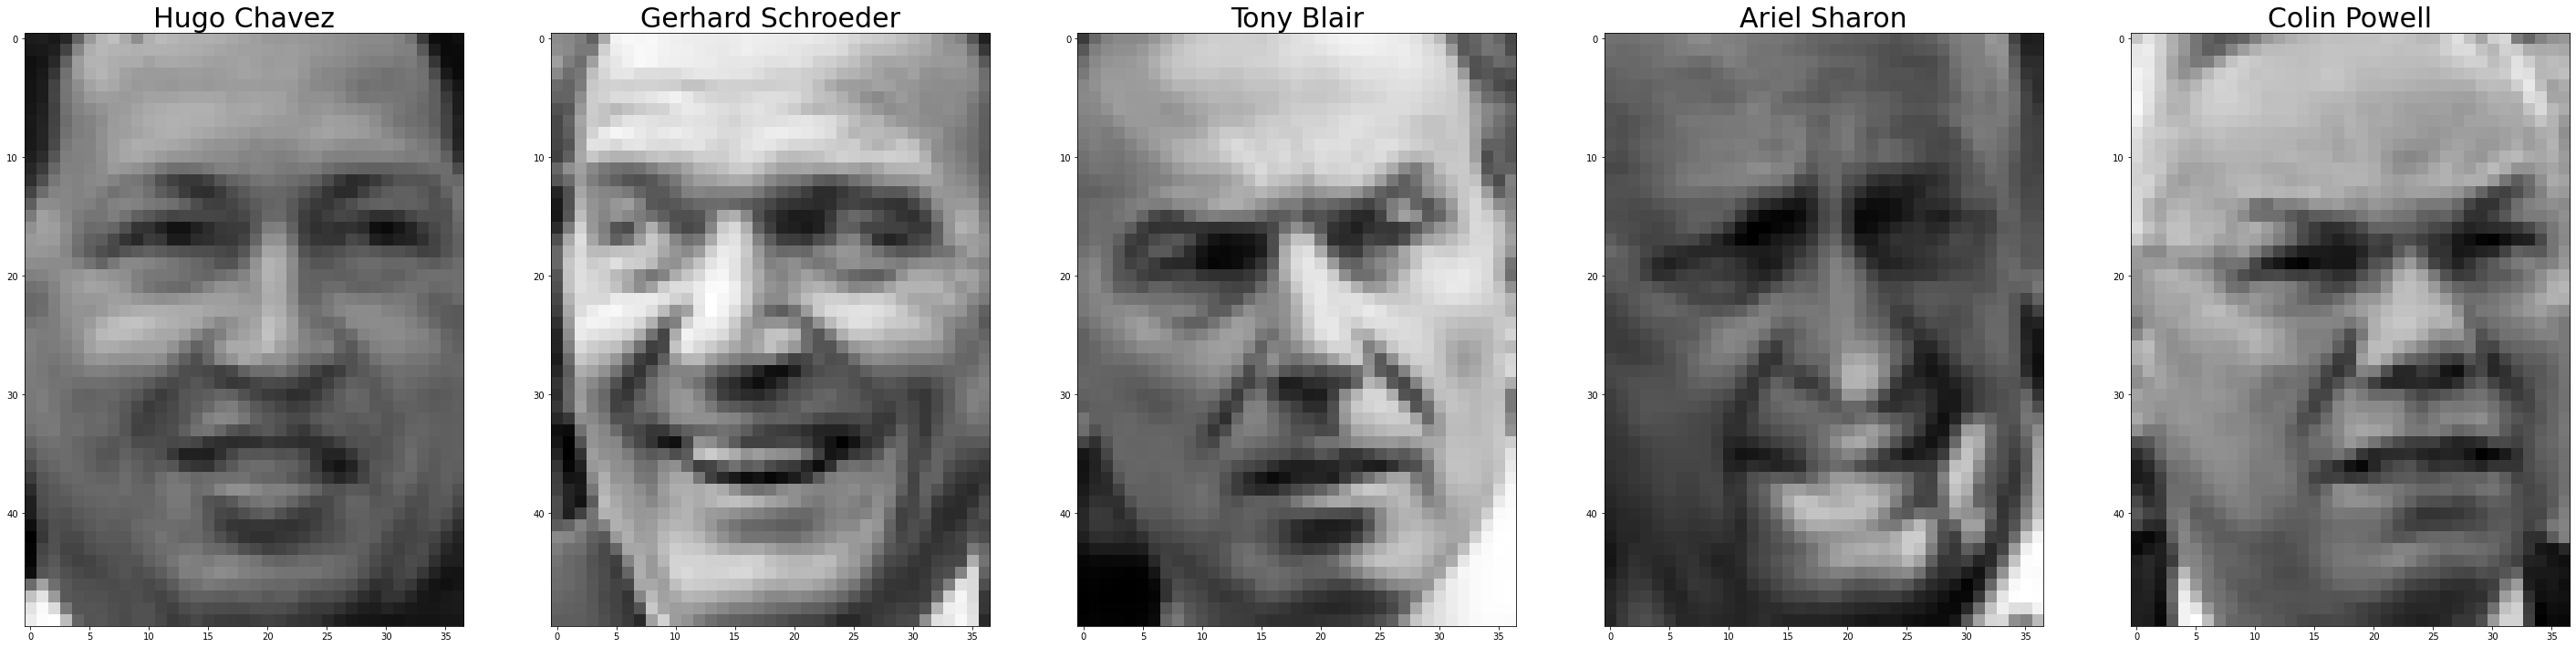

In [12]:
import matplotlib.pyplot as plt 
import cv2
rand_image_idx = np.random.choice(X_train.shape[0], 5)
fig, ax = plt.subplots(1,5, figsize= (50,37))
c =0
for i in rand_image_idx:
    img = X_train[i,:,:]
    ax[c].imshow(img, 'gray')
    ax[c].set_title(f"{target_names[y_train[i]]}", size=30)    
    c = c+ 1
plt.show()

## Import and Compute PCA

In [13]:


from sklearn.decomposition import PCA
pca = PCA(n_components = 50, whiten = True)

In [14]:
pca.fit(X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

PCA(n_components=50, whiten=True)

In [15]:
# Transform Data

pca_X_train = pca.transform(X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
print(pca_X_train.shape)
pca_X_test = pca.transform(X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]))
print(pca_X_test.shape)

(1030, 50)
(258, 50)


In [16]:
cov = pca.get_covariance()
cov.shape

(1850, 1850)

In [17]:
eig_val, eig_vec = np.linalg.eig(cov)
print(eig_val.shape)
print(eig_vec.shape)

(1850,)
(1850, 1850)


In [18]:
sort_idx = np.argsort(eig_val)
sort_idx = sort_idx[::-1]

temp_val = 0
principal_eig_vec_ls = []
principal_eig_val_ls = []
eigen_val_sum = np.sum(eig_val)
i = 0
while temp_val<0.97*eigen_val_sum:
    principal_eig_val_ls.append(eig_val[sort_idx[i]])
    principal_eig_vec_ls.append(eig_vec[sort_idx[i]])
    temp_val += eig_val[sort_idx[i]]
    i += 1

print(f" The number of Principal Components/ Eigen Faces are {len(principal_eig_val_ls)}")
principal_eig_vec_ls[0].shape

 The number of Principal Components/ Eigen Faces are 9


(1850,)

## Computing the EigenFaces

In [20]:
eigenfaces = pca.components_.reshape(50, 50,37)
eigenfaces.shape

(50, 50, 37)

<ipython-input-44-a78cd4db33db>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


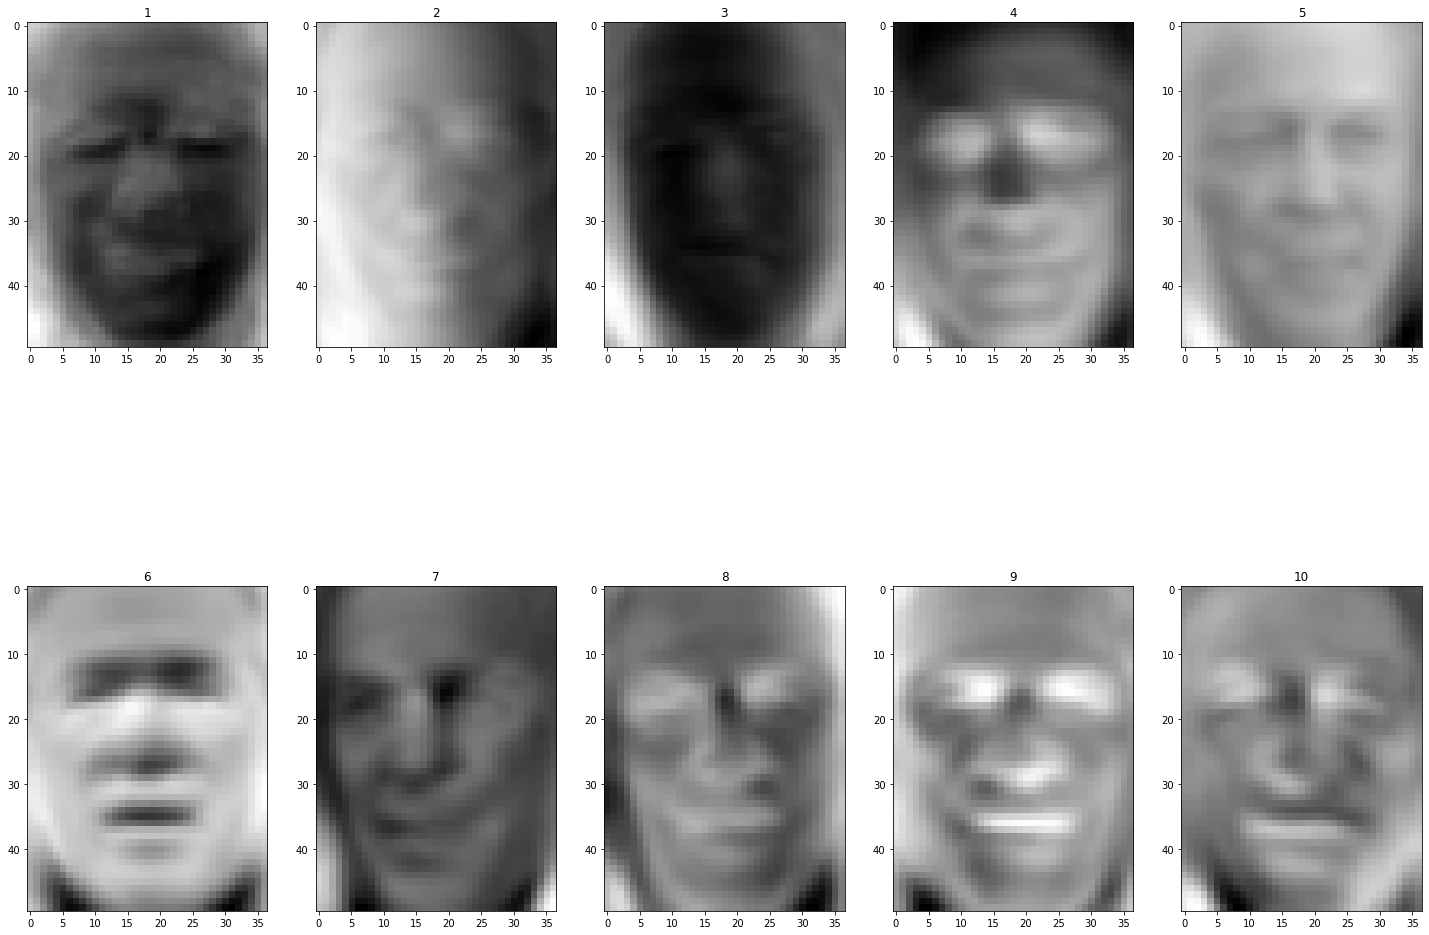

In [44]:
fig, ax = plt.subplots(2,5, figsize=(25,19))
k =0
for j in range(2):
    for i in range(0,5):
        img = eigenfaces[k,:,:]
        k = k+1
        ax[j,i].imshow(img, 'gray')
        ax[j,i].set_title(f'{k}')
        fig.show()

## Classifying using Linear SVC after consulting the sklearnEstimator map.

In [23]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler
params_grid = {
    "penalty" : ['l1', 'l2'],
    'C':uniform(loc=0, scale=4)}

In [24]:
# Compute Linear SVC CLassifier
clf = LinearSVC()

In [25]:
# Running it through a Randomized Search CV to optimize hyperparameters 
rs_clf = RandomizedSearchCV(estimator = clf,
                  param_distributions=params_grid,
                  cv= 5,
                  n_iter=50)

# Fitting Data

rs_clf.fit(pca_X_train, y_train)

I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinea

I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinea

I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinea

I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinea

I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinea

I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_

I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinea

I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinea

I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinea

I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinea

I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinea

RandomizedSearchCV(cv=5, estimator=LinearSVC(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DAB25EB5E0>,
                                        'penalty': ['l1', 'l2']})

In [46]:
rs_clf.best_params_

{'C': 0.5122361121614634, 'penalty': 'l2'}

In [26]:
y_preds = rs_clf.predict(pca_X_test)

In [27]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_test, y_preds)

0.751937984496124

In [28]:
import pandas as pd
print(classification_report(y_test, y_preds, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.64      0.50      0.56        14
     Colin Powell       0.80      0.88      0.83        49
  Donald Rumsfeld       0.65      0.48      0.56        31
    George W Bush       0.79      0.88      0.83       111
Gerhard Schroeder       0.71      0.50      0.59        20
      Hugo Chavez       0.80      0.62      0.70        13
       Tony Blair       0.59      0.65      0.62        20

         accuracy                           0.75       258
        macro avg       0.71      0.64      0.67       258
     weighted avg       0.75      0.75      0.74       258



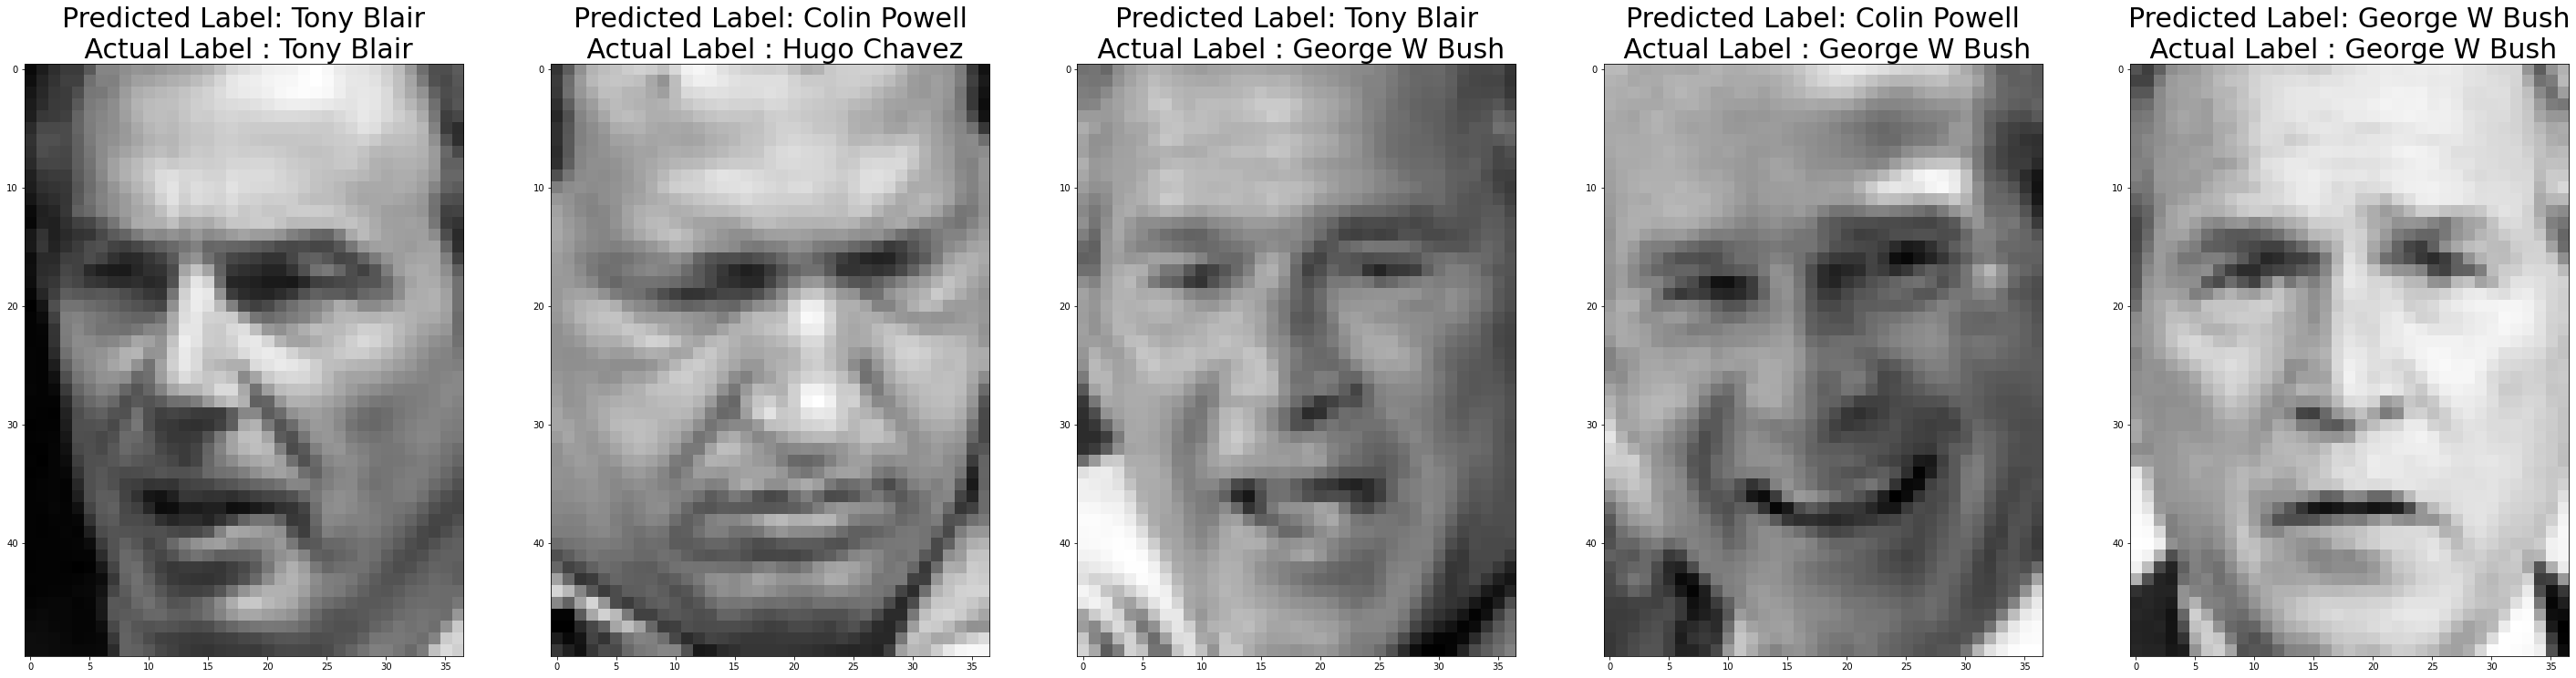

In [33]:
rand_image_idx = np.random.choice(X_test.shape[0], 5)
fig, ax = plt.subplots(1,5, figsize= (50,37))
c =0
for i in rand_image_idx:
    img = X_test[i,:,:]
    ax[c].imshow(img, 'gray')
    ax[c].set_title(f"Predicted Label: {target_names[y_preds[i]]}\n Actual Label : {target_names[y_test[i]]}", size=30)    
    c = c+ 1
plt.show()